In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# 绘制相位谱
def plot_phase_spectrum(phase_spectrum, sample_rate, hop_length, title):
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(phase_spectrum, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='hz')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Phase [radians]')
    plt.show()

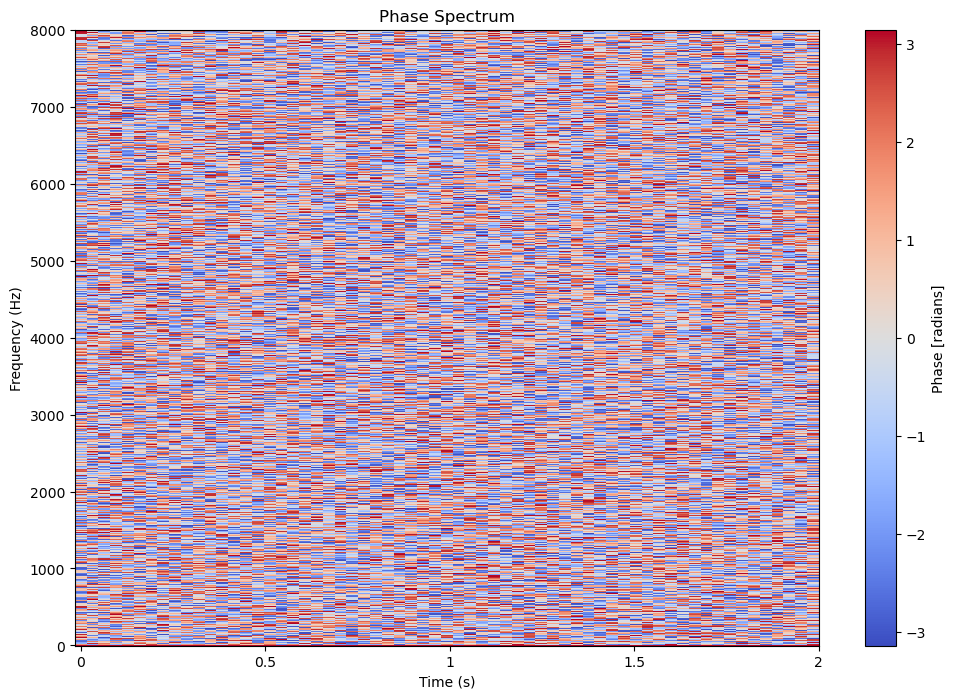

In [21]:
# 音频文件路径
audio_file = r'E:\数据集\ShipEar\data_preprocessing\3_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav'

frame_length = 2048
hop_length = 512

waveform, sample_rate = librosa.load(audio_file, sr=16000)
waveforms_stft_librosa = librosa.stft(waveform, n_fft=frame_length, hop_length=hop_length)
magnitude, phase = librosa.magphase(waveforms_stft_librosa)

phase_angle = np.angle(phase)
plot_phase_spectrum(phase_angle, sample_rate, hop_length, title='Phase Spectrum')

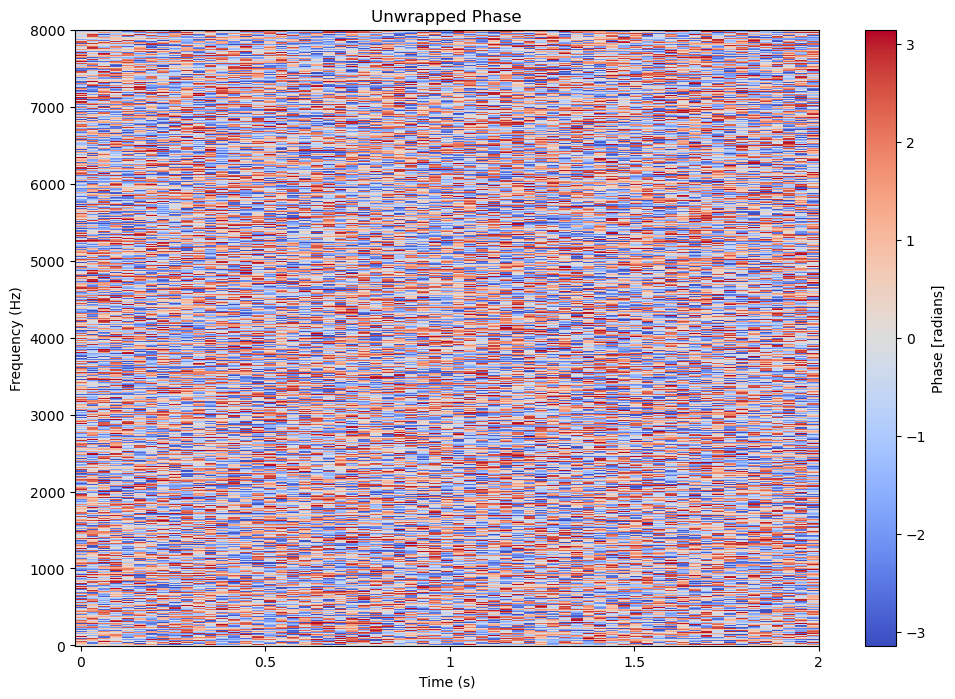

In [42]:
phi_u = np.unwrap(phase_angle, axis=1) 
frames = phi_u.shape[1]
f_bins = librosa.fft_frequencies(sr=sample_rate, n_fft=frame_length)
t = librosa.frames_to_time(frames=np.arange(frames), sr=sample_rate, hop_length=hop_length)

expected = 2*np.pi * f_bins[:, None] * (t[None, :] - t[0])
cand_minus = phi_u - expected
cand_plus  = phi_u + expected
phi_demod = cand_minus if np.mean(np.abs(np.diff(cand_minus, axis=1))) < np.mean(np.abs(np.diff(cand_plus, axis=1))) else cand_plus
phi_demod -= np.mean(phi_demod, axis=1, keepdims=True)
phi_view = (phi_demod + np.pi) % (2*np.pi) - np.pi
plot_phase_spectrum(phi_view, sample_rate, hop_length, title='Unwrapped Phase')